In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt

In [5]:
df = pd.read_csv('/content/temperature_device_failure (1).csv')

In [6]:
df

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


## **DATA PREPROCESSISNG**

In [7]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [8]:
df.describe()

,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7267 non-null   object 
 1   value      7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB


##Data visualization

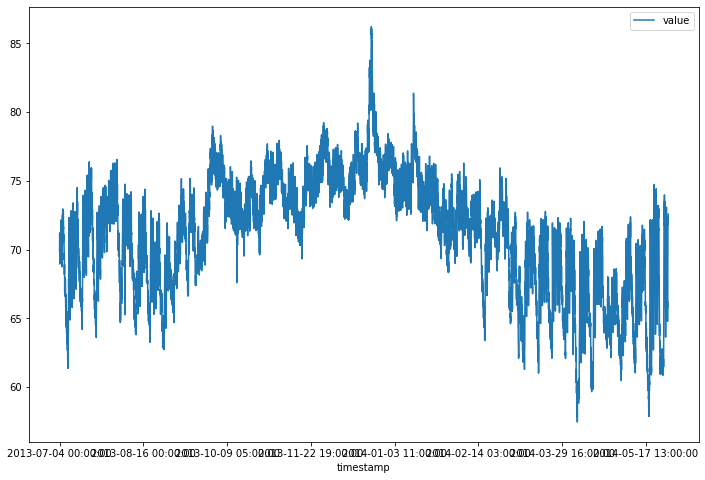

In [10]:
df.set_index('timestamp').plot(figsize=(12, 8))

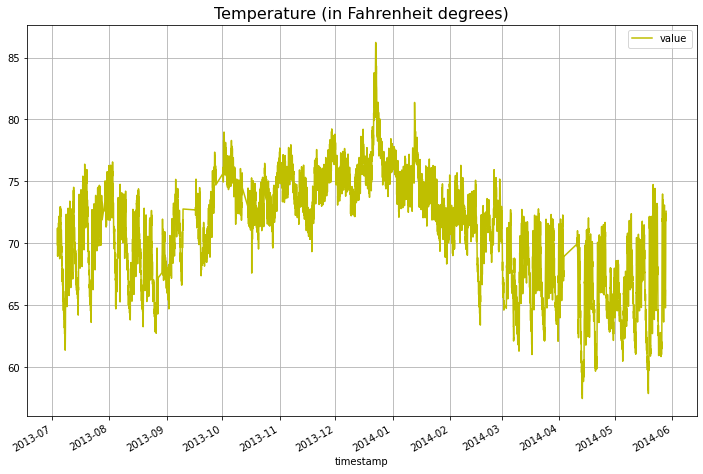

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.plot(x='timestamp', y='value', figsize=(12,8), color = 'y');
plt.title('Temperature (in Fahrenheit degrees)', fontsize=16)
plt.grid();
plt.show();

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 113.7 KB


## **Feature Engineering**

In [13]:
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.weekday
df['hour'] = df['timestamp'].dt.hour
df['year'] = df['timestamp'].dt.year

In [14]:
df

,timestamp,value,day,day_of_week,hour,year
0,2013-07-04 00:00:00,69.880835,4,3,0,2013
1,2013-07-04 01:00:00,71.220227,4,3,1,2013
2,2013-07-04 02:00:00,70.877805,4,3,2,2013
3,2013-07-04 03:00:00,68.959400,4,3,3,2013
4,2013-07-04 04:00:00,69.283551,4,3,4,2013
...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,28,2,11,2014
7263,2014-05-28 12:00:00,72.172956,28,2,12,2014
7264,2014-05-28 13:00:00,72.046565,28,2,13,2014
7265,2014-05-28 14:00:00,71.825226,28,2,14,2014


In [15]:
df["is_weekend"] = (df["day_of_week"] >= 5).astype(int)
df['day_or_night'] = ((df['hour']>=6) & (df['hour']<=18)).astype(int)

In [16]:
df['dtcat'] = df['day_or_night'] + df['is_weekend']*2 #if 0 -- weekday, night | 1 -- weekday, day | 2 -- weekend, night | 3 -- weekend, day
df

,timestamp,value,day,day_of_week,hour,year,is_weekend,day_or_night,dtcat
0,2013-07-04 00:00:00,69.880835,4,3,0,2013,0,0,0
1,2013-07-04 01:00:00,71.220227,4,3,1,2013,0,0,0
2,2013-07-04 02:00:00,70.877805,4,3,2,2013,0,0,0
3,2013-07-04 03:00:00,68.959400,4,3,3,2013,0,0,0
4,2013-07-04 04:00:00,69.283551,4,3,4,2013,0,0,0
...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,28,2,11,2014,0,1,1
7263,2014-05-28 12:00:00,72.172956,28,2,12,2014,0,1,1
7264,2014-05-28 13:00:00,72.046565,28,2,13,2014,0,1,1
7265,2014-05-28 14:00:00,71.825226,28,2,14,2014,0,1,1


# Splitting the data

In [17]:
df1 = df.copy()

In [18]:
df1.drop('timestamp', axis = 1, inplace = True)

In [19]:
x = df1[['value', 'day', 'day_of_week', 'hour']]
y = df1['dtcat']

In [20]:
# Calculate Frequency in the y values
unique, counts = np.unique(y, return_counts=True)

print(np.array((unique, counts)).T)

[[   0 2404]
 [   1 2839]
 [   2  932]
 [   3 1092]]


# **K-Means**

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 

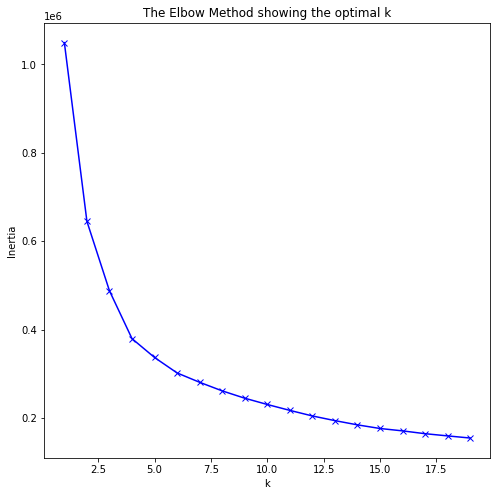

In [22]:
inertia = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [24]:
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(x)
score = silhouette_score(x, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.311


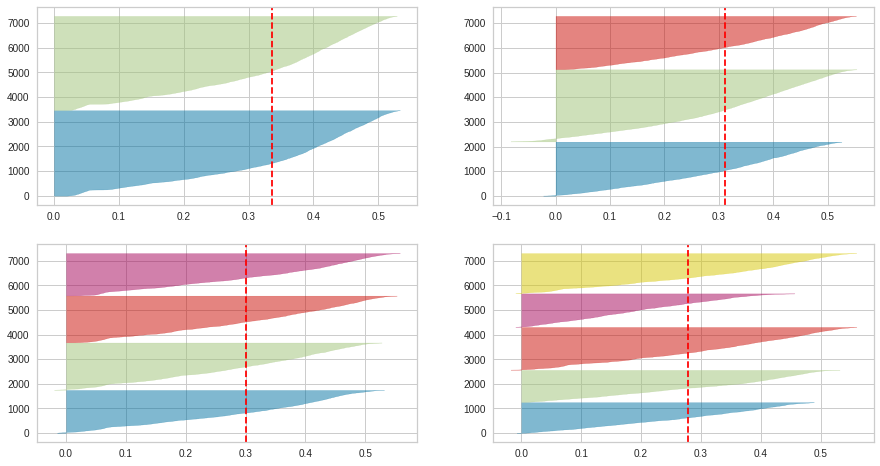

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)


# Standardize the Data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x)
# Apply transform to both the training set and the test set.
x = scaler.transform(x)

## **PCA**

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pcax = pca.fit_transform(x)


pca.explained_variance_ratio_

array([0.29090108, 0.25689549])

In [28]:
pcadf = pd.DataFrame(data = pcax, columns = ['principal component 1', 'principal component 2'])
pcadf

,principal component 1,principal component 2
0,1.149213,-0.542781
1,0.847573,-0.613265
2,0.821983,-0.649444
3,1.055073,-0.653476
4,0.920073,-0.703251
...,...,...
7262,-0.343932,1.369768
7263,-0.393350,1.330628
7264,-0.454399,1.290043
7265,-0.499863,1.251394


In [29]:
k = 3
kmeans = KMeans(n_clusters = k)
kmeans.fit(pcax)
pred = kmeans.predict(pcax)
unique, counts = np.unique(pred, return_counts=True)

print(np.array((unique, counts)).T)

[[   0 2461]
 [   1 2429]
 [   2 2377]]


In [30]:
center = kmeans.cluster_centers_
print(center)

[[-0.74103007  0.77714909]
 [ 1.17571102  0.1933925 ]
 [-0.43527779 -1.00049442]]


In [31]:
#Function that calculates the distance between a point and centroid of a cluster, returns the distances in pandas series
def eucleadian_dist(data, model):
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [32]:
distance = eucleadian_dist(pcadf, kmeans)
distance

0       2.305479
1       2.111140
2       2.116171
3       2.296230
4       2.225050
          ...   
7262    2.372022
7263    2.331500
7264    2.290617
7265    2.252815
7266    2.209918
Length: 7267, dtype: float64

In [33]:
#Assume that the outliers fraction 1%
outliers_fraction = 0.01

number_of_outliers = int(outliers_fraction*len(distance))

threshold = distance.nlargest(number_of_outliers).min()

pcadf['anomaly1'] = (distance >= threshold).astype(int)
unique, counts = np.unique(pcadf['anomaly1'] , return_counts=True)

print(np.array((unique, counts)).T)

[[   0 7195]
 [   1   72]]


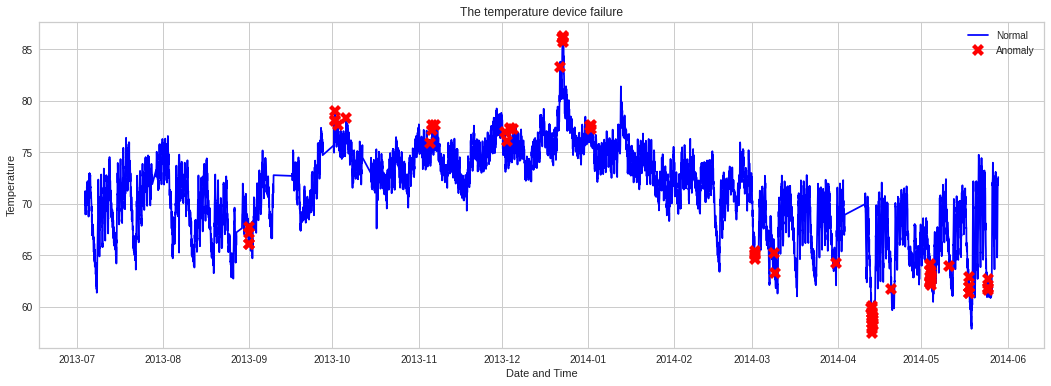

In [34]:
df['anomaly1'] = pd.Series(pcadf['anomaly1'].values, index=df.index)
a = df.loc[df['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot( df['timestamp'], df['value'],  color='blue', label='Normal')
_ = plt.plot(a['timestamp'], a['value'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Temperature')
_ = plt.title('The temperature device failure')
_ = plt.legend(loc='best')
plt.show()

# Interquartile Range

In [35]:
# Calculate IQR for the 1st principal component (pc1)
q1, q3 = df['value'].quantile([0.25, 0.75])
iqr = q3- q1
# Calculate upper and lower bounds for outlier for pc1
lower = q1 - (1.5*iqr)
upper = q3 + (1.5*iqr)
# Filter out the outliers from the pc1
upper_out = ((pcadf['principal component 1']>upper_pc1) | (pcadf['principal component 1']<lower_pc1)).astype('int')
# Calculate IQR for the 2nd principal component (pc2)
q1_pc2, q3_pc2 = pcadf['principal component 2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
# Calculate upper and lower bounds for outlier for pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)
# Filter out the outliers from the pc2
pcadf['anomaly_pc2'] = ((pcadf['principal component 2']>upper_pc2) | (pcadf['principal component 2']<lower_pc2)).astype('int')

unique, counts = np.unique(pcadf['anomaly_pc1'], return_counts=True)
unique1, counts1 = np.unique(pcadf['anomaly_pc2'], return_counts=True)
print(np.array((unique, counts)).T, np.array((unique1, counts1)).T)


[[   0 7261]
 [   1    6]] [[   0 7267]]


In [46]:
outliers_iqr = (lower_pc2 ) * 100
outliers_iqr

100.0

In [53]:
len(lower_pc2 )

TypeError: ignored

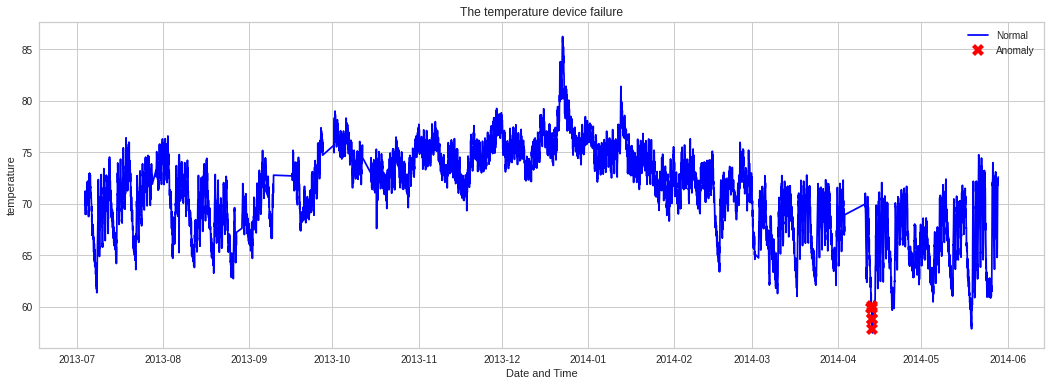

In [36]:
# Let's plot the outliers from pc1 on top of the value and see where they occured in the time series
a =df[pcadf['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['timestamp'], df['value'], color='blue', label='Normal')
_ = plt.plot(a['timestamp'],a['value'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('temperature')
_ = plt.title('The temperature device failure')
_ = plt.legend(loc='best')
plt.show();

## **Gaussian Distribution**

In [37]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.01)

pred_ee = ee.fit_predict(df[['value']])

pcadf['anomaly2'] = pred_ee
unique2, counts2 = np.unique(pred_ee, return_counts=True)
print(np.array((unique2, counts2)).T)


[[  -1   73]
 [   1 7194]]


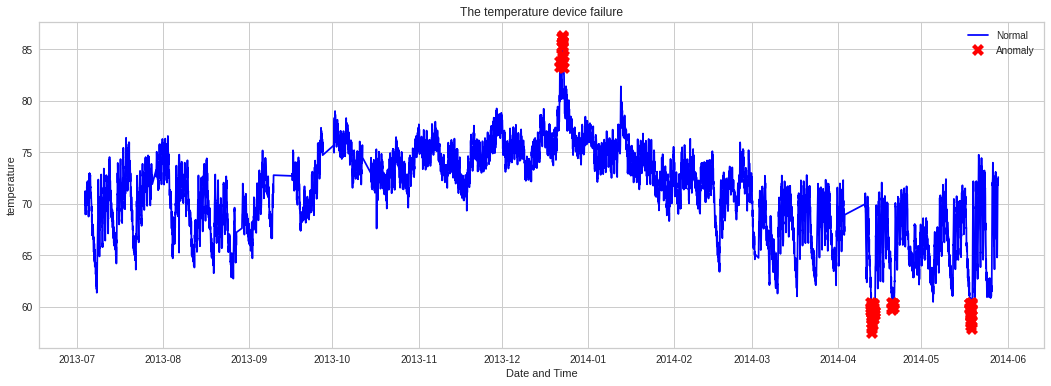

In [38]:
a =df[pcadf['anomaly2']  == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['timestamp'], df['value'], color='blue', label='Normal')
_ = plt.plot(a['timestamp'],a['value'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('temperature')
_ = plt.title('The temperature device failure')
_ = plt.legend(loc='best')
plt.show();

# Isolation Forest

[[  -1   73]
 [   1 7194]]


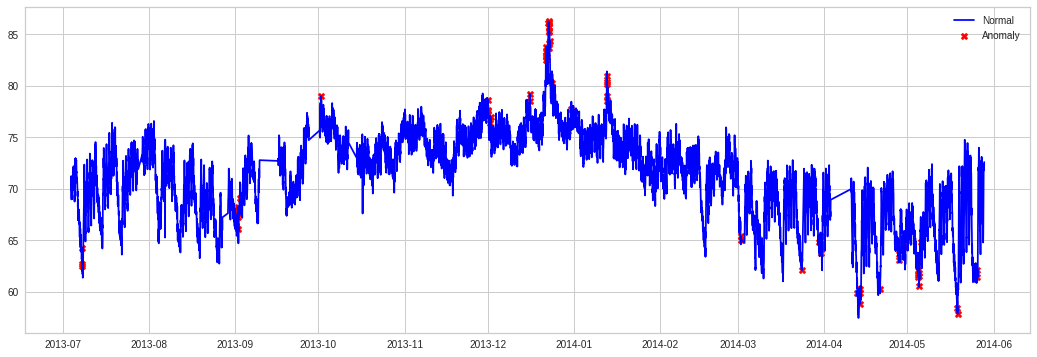

In [41]:
from sklearn.ensemble import IsolationForest

ifor =  IsolationForest(contamination=outliers_fraction)
ifor.fit(x) 
df['anomaly3'] = pd.Series(ifor.predict(x))
unique3, counts3 = np.unique(df['anomaly3'], return_counts=True)
print(np.array((unique3, counts3)).T)

# visualization
fig, ax = plt.subplots(figsize=(18,6))

anomoly = df.loc[df['anomaly3'] == -1, ['timestamp', 'value']] #anomaly

ax.plot(df['timestamp'], df['value'], color='blue', label = 'Normal')
ax.scatter(anomoly['timestamp'],anomoly['value'], marker='X', color='red', label = 'Anomaly')
plt.legend()
plt.show();